This is my first kernel (Hurray!!) in Kaggle to analyse the causes of Heart disease and build a simple ML model to classify and predict the Heart diseases based on certain features

Attribute Information (Feature Variables): 
1. age 
2. sex 
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

14. Target 0 or 1  ----> Target Variable

Objectives:
1. To predict certain cardiovascular events
2. Heart disease predominantly occurs in Male or Female
3. Heart Disease predominantly occurs at which age group
4. Correlation between 
    a) target & chest pain type
    b) thal & target
    c) Gender & Thal
    d) Age & Thal
    e) fasting blood sugar & thal
    f) chol & thal
    g) chol & tbps

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [2]:
# Reading the original csv file
df = pd.read_csv("../input/heart.csv")

Exploratory Data Analysis (EDA)

In [3]:
df.columns #View the column headers

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.head()  #Peek into the first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()  #Peek into the last 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.shape   #Look at the Shape of the DataFrame

(303, 14)

In [7]:
df.info()  #Look at the data types and look for null values using info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
df.describe() # Descriptive statistics (or) Summary Statistics 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Sorting the DataFrame by Age
print(df.sort_values(by=['age']))

     age  sex  cp  trestbps  chol   ...    oldpeak  slope  ca  thal  target
72    29    1   1       130   204   ...        0.0      2   0     2       1
58    34    1   3       118   182   ...        0.0      2   0     2       1
125   34    0   1       118   210   ...        0.7      2   0     2       1
239   35    1   0       126   282   ...        0.0      2   0     3       0
65    35    0   0       138   183   ...        1.4      2   0     2       1
227   35    1   0       120   198   ...        1.6      1   0     3       0
157   35    1   1       122   192   ...        0.0      2   0     2       1
1     37    1   2       130   250   ...        3.5      0   0     2       1
115   37    0   2       120   215   ...        0.0      2   0     2       1
164   38    1   2       138   175   ...        0.0      2   4     2       1
163   38    1   2       138   175   ...        0.0      2   4     2       1
259   38    1   3       120   231   ...        3.8      1   0     3       0
154   39    

In [10]:
df['sex'] = df['sex'].astype('category') # convert the sex column as categorical using astype() method

Visual Exploratory Data Analysis (Visual EDA)

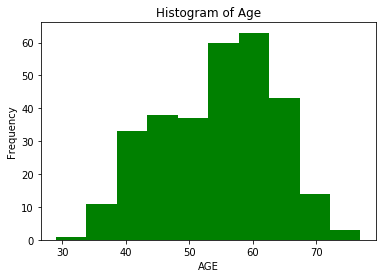

In [11]:
# Distribution of Age using Histogram
plt.hist(df.age, bins=10, color='green')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

The sample contains more samples from age group 55 to 65 than any other age group

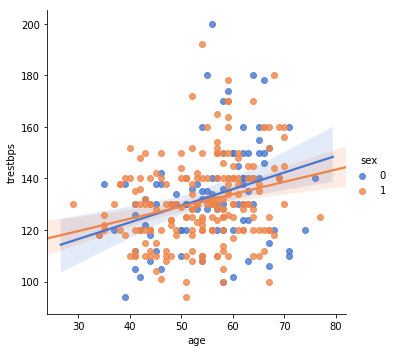

Correlation Coefficient:0.2793509065612883


In [12]:
# Plotting the Rest Blood Pressure against age and comparison between sex
sns.lmplot(x='age', y='trestbps', data=df, hue='sex', palette='muted')
plt.show()
print('Correlation Coefficient:{}'.format(np.corrcoef(df.age, df.trestbps)[0,1]))

There is a positive correlation between age and rest blood pressure. The Females tend to have slightly higher chance of high blood pressure than males post the age of 50

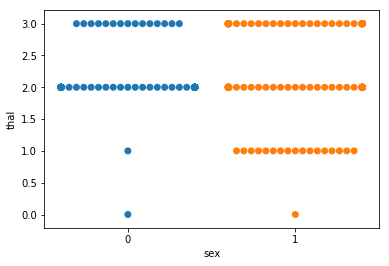

In [13]:
# BeeSwarm plot for classifying common kind of heart defects in males and females
sns.swarmplot(x='sex', y='thal', data=df, size=7)
plt.show()

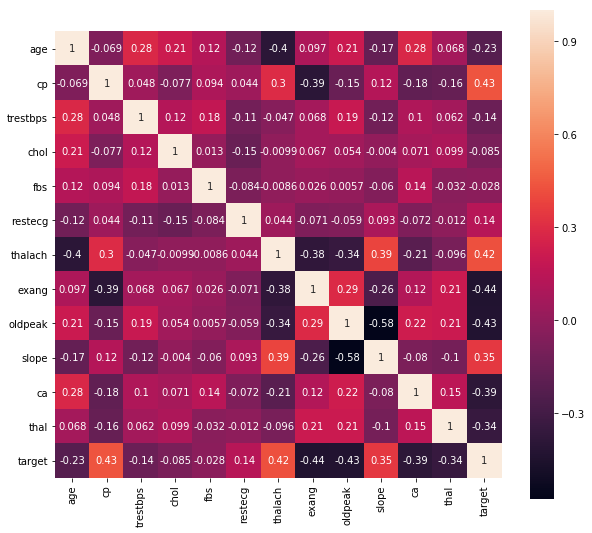

In [14]:
# Heatmap for itendifying the correlation between different variables
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10,9))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})
plt.show()

The target has comparitively higher correlation with chest pain and highest heart rate achieved and slope of the ST curve than other variables. 

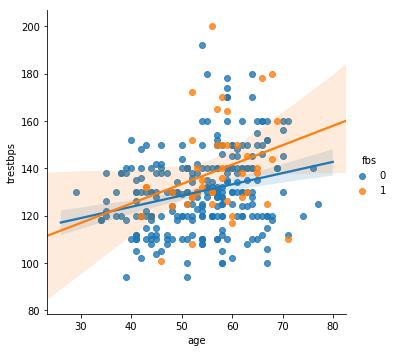

In [15]:
# Regression model between Resting Blood Pressure and Age and effect of blood sugar level of them
sns.lmplot(x='age', y='trestbps', data=df, hue='fbs')
plt.show()

Clearly, blood sugar level higher than 120 mg/dl increases the risk of blood pressure as age increases.

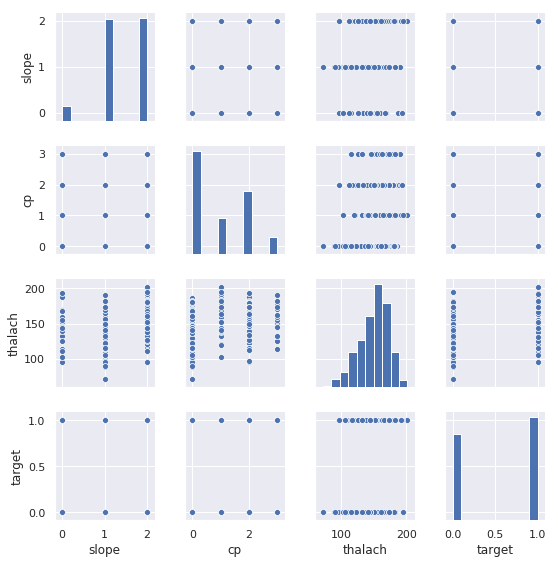

In [16]:
# Pair plot between ordinal variables
sns.set()
cols1= ['slope','cp', 'thalach', 'target']
sns.pairplot(df[cols1], size=2)
plt.show()

In [17]:
# filtering of DataFrame using Boolean functions
df1 = df[(df['sex']==1) & (df['fbs']==1)]
print(df1)

     age sex  cp  trestbps  chol   ...    oldpeak  slope  ca  thal  target
0     63   1   3       145   233   ...        2.3      0   0     1       1
8     52   1   2       172   199   ...        0.5      2   0     3       1
23    61   1   2       150   243   ...        1.0      1   0     2       1
26    59   1   2       150   212   ...        1.6      2   0     2       1
29    53   1   2       130   197   ...        1.2      0   0     2       1
64    58   1   2       140   211   ...        0.0      2   0     2       1
76    51   1   2       125   245   ...        2.4      1   0     2       1
78    52   1   1       128   205   ...        0.0      2   0     2       1
83    52   1   3       152   298   ...        1.2      1   0     3       1
87    46   1   1       101   197   ...        0.0      2   0     3       1
90    48   1   2       124   255   ...        0.0      2   2     2       1
97    52   1   0       108   233   ...        0.1      2   3     3       1
99    53   1   2       13

In [18]:
# Usage of groupby function # Multi-leve grouping
print("Average Cholestrol based on Gender")
print(df.groupby('sex')['chol'].mean())
print("Average Resting Blood Pressure based on Gender")
print(df.groupby('sex')['trestbps'].mean())

Average Cholestrol based on Gender
sex
0    261.302083
1    239.289855
Name: chol, dtype: float64
Average Resting Blood Pressure based on Gender
sex
0    133.083333
1    130.946860
Name: trestbps, dtype: float64


In [19]:
# Grouping using aggregate method
df.groupby(['thal','cp']).mean()

age    trestbps    ...           ca    target
thal cp                           ...                       
0    0   52.000000  128.000000    ...     0.000000  0.000000
     2   53.000000  128.000000    ...     0.000000  1.000000
1    0   56.916667  137.583333    ...     1.083333  0.250000
     1   53.500000  147.500000    ...     1.500000  0.500000
     2   57.500000  128.000000    ...     1.000000  0.000000
     3   57.500000  131.500000    ...     0.000000  1.000000
2    0   56.019231  127.692308    ...     0.653846  0.557692
     1   50.820513  128.076923    ...     0.307692  0.897436
     2   51.403226  129.451613    ...     0.483871  0.919355
     3   58.230769  139.769231    ...     0.846154  0.692308
3    0   55.333333  134.102564    ...     1.166667  0.089744
     1   53.222222  125.555556    ...     0.666667  0.555556
     2   59.136364  133.318182    ...     0.863636  0.500000
     3   51.625000  145.000000    ...     0.000000  0.625000

[14 rows x 11 columns]

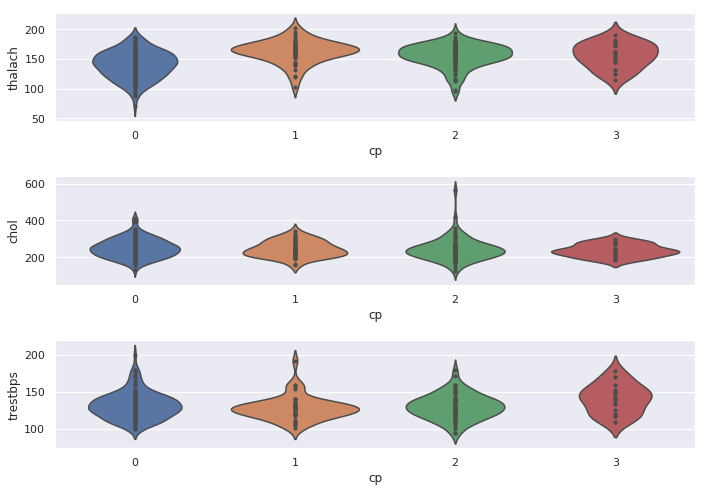

In [20]:
# Violin Plots to demonstrate the highest heart rate achieved and cholestrol for different chest pain types
plt.figure(figsize=(10,7))
plt.subplot(3,1,1)
sns.violinplot(x='cp', y='thalach', inner='points', data=df)
plt.xticks
plt.subplot(3,1,2)
sns.violinplot(x='cp', y='chol', inner='points', data=df)
plt.subplot(3,1,3)
sns.violinplot(x='cp', y='trestbps', inner='points', data=df)
plt.tight_layout()
plt.show()

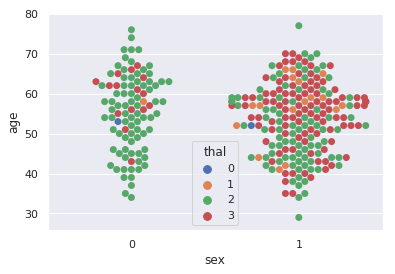

In [21]:
# Beeswarm plot for understanding the defect types for different ages in males and females
sns.swarmplot(x='sex', y='age', hue='thal', data=df, size=7, palette='deep')
plt.legend(title='thal', loc='lower center')
plt.show()

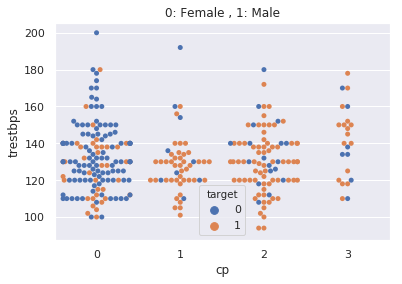

In [22]:
# Beeswarm Plot to understand the heart failures in males and females with chest pain types
sns.swarmplot(x='cp', y='trestbps', hue='target', data=df)
plt.title("0: Female , 1: Male")
plt.show()

In [23]:
# Lambda Function to normalize the cholestrol and resting BP between 0 and 1
normalize = lambda col_name: df[col_name] /df[col_name].max()
df['trestbps_norm'] = normalize('trestbps')
df['chol_norm'] = normalize('chol')

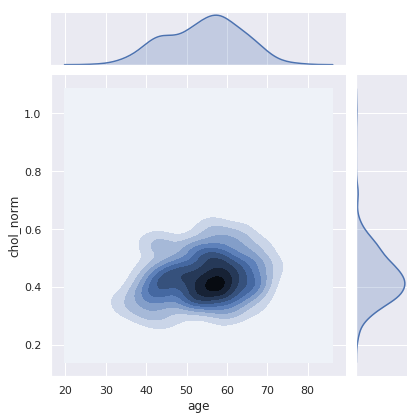

In [24]:
# Joint Plot with Contours for cholestrol levels for age groups
sns.jointplot(x='age', y='chol_norm', data=df, kind='kde')
plt.show()

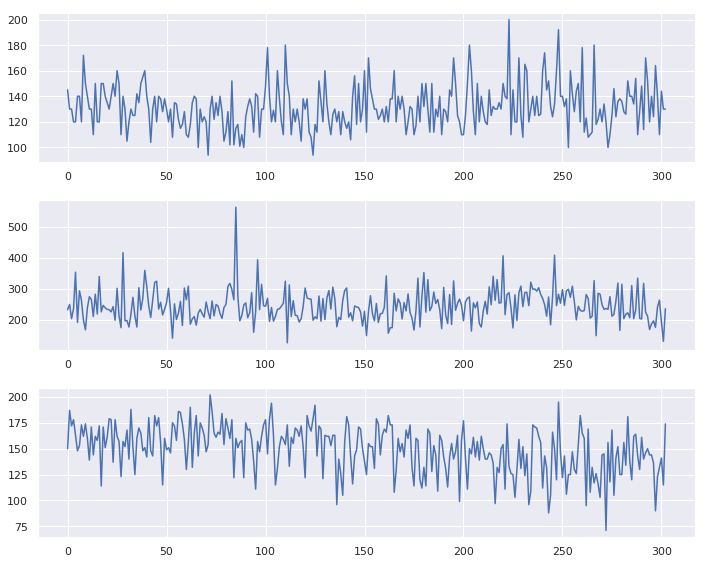

In [25]:
# Multiple plots using subplot
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(df['trestbps'])
plt.subplot(3,1,2)
plt.plot(df['chol'])
plt.subplot(3,1,3)
plt.plot(df['thalach'])
plt.tight_layout()
plt.show()

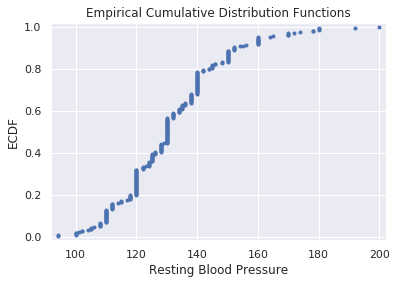

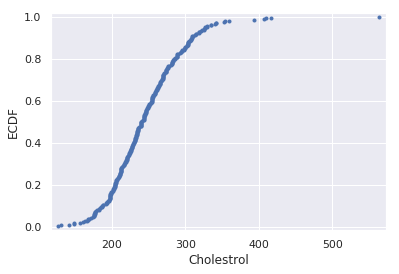

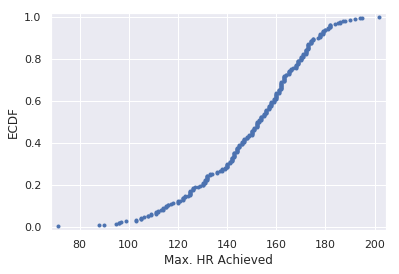

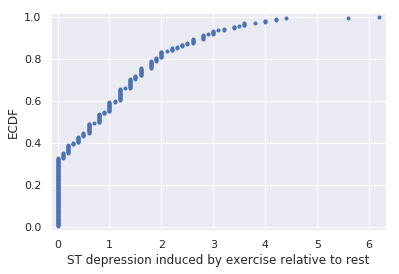

In [26]:
# Empirical cumulative distribution function to understand the distribution of Resting BP, Cholestrol and Max. HR Ach.
def ecdf(data):
    """
    Function Definition: Empirical cumulative distribution function 
    to understand the distribution of Resting BP, Cholestrol and 
    Max. HR Ach.
    
    """
    n=len(data)
    x=np.sort(data)
    y=np.arange(1, n+1)/n
    return x, y
x1, y1 = ecdf(df['trestbps'])
plt.plot(x1, y1, marker='.', linestyle='none')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('ECDF')
plt.title('Empirical Cumulative Distribution Functions')
plt.margins(0.02)
plt.show()
x2, y2 = ecdf(df['chol'])
plt.plot(x2, y2, marker='.', linestyle='none')
plt.xlabel('Cholestrol')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()
x3, y3 = ecdf(df['thalach'])
plt.plot(x3, y3, marker='.', linestyle='none')
plt.xlabel('Max. HR Achieved')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()
x4, y4 = ecdf(df['oldpeak'])
plt.plot(x4, y4, marker='.', linestyle='none')
plt.xlabel('ST depression induced by exercise relative to rest')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

Data Preprocessing and Data Preparation

In [27]:
df.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
target           0
trestbps_norm    0
chol_norm        0
dtype: int64

There are no null values

In [28]:
# One Hot encoding of Nominal features
nom_fet = ['sex', 'cp', 'restecg', 'exang', 'ca', 'thal']
df[nom_fet] = df[nom_fet].astype('category')
df_nom_fet = df[nom_fet]
df_onehot = pd.get_dummies(df_nom_fet, drop_first=False)

In [29]:
df.drop(nom_fet, axis=1, inplace=True)

In [30]:
df1 = pd.concat([df, df_onehot], axis=1)

Let's Standardize the numeric features with continuous values

In [31]:
cont_fet = ['trestbps', 'chol', 'thalach', 'oldpeak', 'slope']
df_cont = df1[cont_fet]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(df_cont)
scaled = ss.transform(df_cont)

for i, col in enumerate(cont_fet):
    df1[col] = scaled[:,i]

In [32]:
# Supervised learning ML model using scikit learning module
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X = df1.drop('target', axis=1).values
y = df1['target'].values
knn = KNeighborsClassifier(n_neighbors=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test Set Predictions:\n{}".format(y_pred))
print("Score:", knn.score(X_test, y_test))


Test Set Predictions:
[1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1
 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1]
Score: 0.8021978021978022


In [33]:
# Supervised learning ML model using scikit learning module
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
print("Best Params:", knn_cv.best_params_)
print("Best score:", knn_cv.best_score_)



Best Params: {'n_neighbors': 1}
Best score: 0.7887788778877888


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


This model perform a lot better than the previous model which has a score of just 59%. Though the model without hyperparameter tuning performs better in the test set, the model with hyperparameter tuning using GridSearchCV will out perform the model without tuning when used on unseen data.